In [1]:
from database import get_items_list
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

In [54]:
all_items = []

for n in range(1, 41):
    all_items.extend(get_items_list(n, 100, "").items)

items_with_prices = []

for item in all_items:
    if item.price_usd > 0:
        items_with_prices.append(item)

In [50]:
def wanted_items_by_usd(isUsd, min_price, max_price):
    def wanted_items(item):
        title = item.title.lower()
        desc = item.description.lower()
        text = title + " " + desc
        length = len(" ".join(set(text.split(" "))))
        if (item.deleted == False and
            item.usd == isUsd and
            # "somi"     in text and
            # "pro"        in text and
            # "book"       in text and
            # "256"        in text and
            # "air"        not in text and
            # "placa"      not in text and
            # "imac"       not in text and
            # "ipad"       not in text and
            # "phone"      not in text and
            # "repuesto"   not in text and
            # item.price_usd != 111   and
            # item.price_usd != 222   and
            # item.price_usd != 333   and
            # item.price_usd != 444   and
            # item.price_usd != 555   and
            # item.price_usd != 666   and
            # item.price_usd != 777   and
            # item.price_usd != 888   and
            # item.price_usd != 999   and
            # item.price_usd != 1111  and
            # item.price_usd != 2222  and
            # item.price_usd != 3333  and
            # item.price_usd != 4444  and
            # length > 80 and
            item.price_usd >=  min_price   and
            item.price_usd <=  max_price and
           True):
            return True
        return False
    return wanted_items

def filter_items(isUsd, min_price, max_price):
    filtered_items = filter(wanted_items_by_usd(isUsd, min_price, max_price), items_with_prices)
    filtered_items = sorted(filtered_items, key=lambda i: i.price_usd)
    # if isUsd:
    #     filtered_items *= 7 # times more items if it is USD
    return filtered_items

def calculate_prices_usd(isUsd, min_price, max_price):
    filtered_items = filter_items(isUsd, min_price, max_price)
    prices_usd = []
    
    for item in filtered_items:
        prices_usd.append(item.price_usd)
        # print(item.title.ljust(100), item.price_usd)
    
    return prices_usd

def get_urls(isUsd, min_price, max_price):
    filtered_items = filter_items(isUsd, min_price, max_price)
    urls = []
    
    for item in filtered_items:
        title = item.title.lower()
        desc = item.description.lower()
        text = title + " " + desc
        length = len(" ".join(set(text.split(" "))))
        urls.append((length, item.url))
        # print(item.title.ljust(100), item.price_usd)

    urls.sort(key=lambda i: i[0])
    
    return urls

def calculate_and_print_for(currency, bins, min_price, max_price):
    if currency == "USD":
        prices = calculate_prices_usd(True, min_price, max_price)
        count = len(prices)
        print("Count Items USD: ", count)
    elif currency == "ARS":
        prices = calculate_prices_usd(False, min_price, max_price)
        count = len(prices)
        print("Count Items ARS: ", count)
    elif currency == "ALL":
        prices = []
        prices += calculate_prices_usd(True, min_price, max_price)
        prices += calculate_prices_usd(False, min_price, max_price)
        count = len(prices)
        print("Count Items ALL: ", count)
    else:
        raise Exception(f"Unknown currency {currency}")
    counts, bins, bars = plt.hist(prices, bins)
    return (prices, (counts, bins, bars),)

def count_chars_in_text():
    chars = []
    for item in items_with_prices:
        title = item.title.lower()
        desc = item.description.lower()
        text = title + " " + desc
        # length = len(text)
        length = len(" ".join(set(text.split(" "))))
        #if length < 100:
        #    continue
        # if length > 700:
        #     continue
        chars.append(length)
    return chars
    

Count Items ALL:  1041


2025-02-17 18:31:51.277 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=1e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,7.954913e-07,153.028672,167.872483,0.045666,0.06825,0.000116


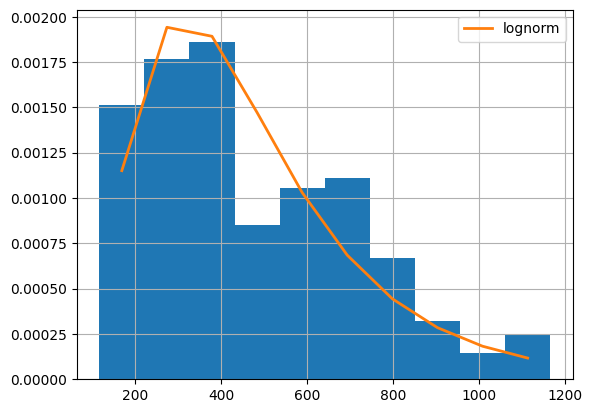

In [66]:
usd_bins = 10
min_price = 30
max_price = 1200
items_usd, usd_hist = calculate_and_print_for("ALL", usd_bins, min_price, max_price)

dists = ["lognorm"]

f = Fitter(items_usd,
           distributions = dists,
           bins = usd_bins)
f.fit()
f.summary()

Count Items ALL:  835


2025-02-17 18:27:01.556 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=5.3e-05)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000053,399.954625,414.13692,0.354155,0.067078,0.001037


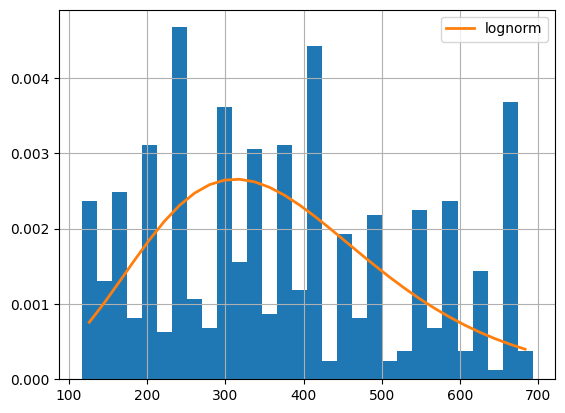

In [56]:
ars_bins = 30
min_price = 20
max_price = 700

items_ars, ars_hist = calculate_and_print_for("ALL", ars_bins, min_price, max_price)

dists = ["lognorm"]

f = Fitter(items_ars,
           distributions = dists,
           bins = ars_bins)
f.fit()
f.summary()

In [26]:
len(items_with_prices)

241

2025-02-17 11:49:02.062 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=9e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000009,1045.915561,1056.369952,inf,0.979757,0.0


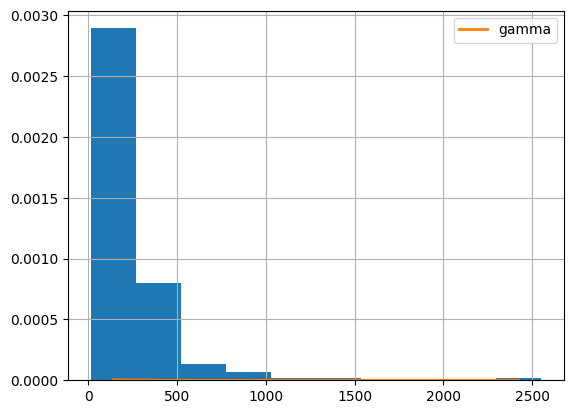

In [28]:
chars = count_chars_in_text()

usd_bins = 10

dists = ["gamma"]

f = Fitter(chars,
           distributions = dists,
           bins = usd_bins)
f.fit()
f.summary()

In [86]:
items_usd[:20]

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111]